# **Damage Detection using Image Processing**

# **Import Libraries**

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow
from PIL import Image, ImageFilter

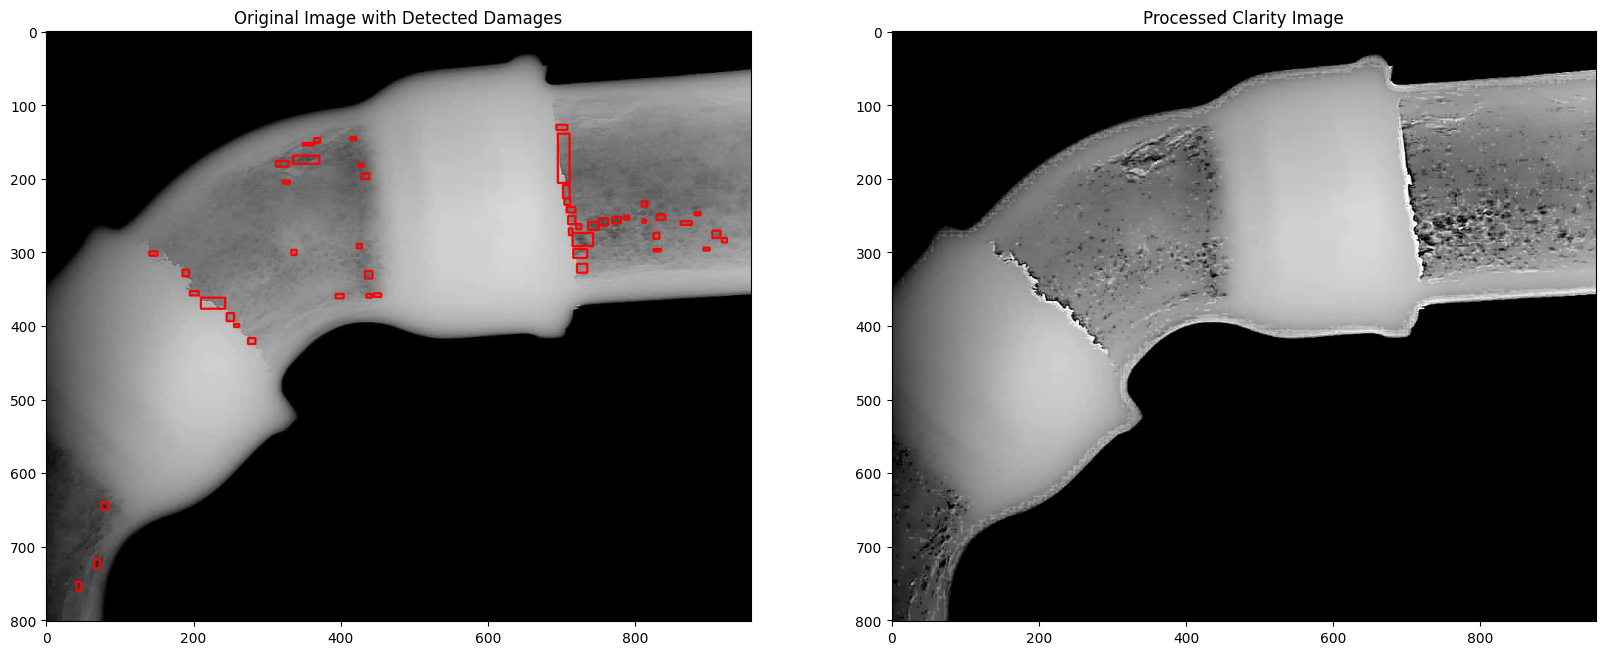

In [ ]:
# Load the original image
original_image = cv2.imread('pipe.JPG')
processed_image = original_image.copy()

# Apply Gaussian Blur for Noise Reduction
processed_image = cv2.GaussianBlur(processed_image, (1, 1), 0)

# Enhance the image using Unsharp Mask Filter
enhanced_image = Image.fromarray(processed_image)
enhanced_image = enhanced_image.filter(ImageFilter.UnsharpMask(radius=5, percent=400, threshold=5))
processed_image = np.array(enhanced_image)

# Convert the image to grayscale
gray_image = cv2.cvtColor(processed_image, cv2.COLOR_BGR2GRAY)

# Apply Adaptive Thresholding
threshold_image = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 55, 8)

# Apply Morphological Operations (Erosion)
kernel_size = (2, 3)
kernel = np.ones(kernel_size, np.uint8)
eroded_image = cv2.erode(threshold_image, kernel, iterations=1)

# Find Contours in the eroded image
contours, _ = cv2.findContours(eroded_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw bounding boxes around detected damages on the original image
for contour in contours:
    area = cv2.contourArea(contour)
    if 10 < area < 200:  # Adjust the size threshold as needed
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(original_image, (x, y), (x + w, y + h), (0, 0, 255), 2)

# Display the results using matplotlib subplot
plt.figure(figsize=(20, 15))

# Plot the original image with bounding boxes
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image with Detected Damages')

# Plot the clarity image
plt.subplot(1, 2, 2)
plt.imshow(processed_image, cmap='gray')
plt.title('Processed Clarity Image')

plt.show()


array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[24, 24, 24],
        [24, 24, 24],
        [25, 25, 25],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[24, 24, 24],
        [26, 26, 26],
        [27, 27, 27],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[24, 24, 24],
        [26, 26, 26],
        [27, 27, 27],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)
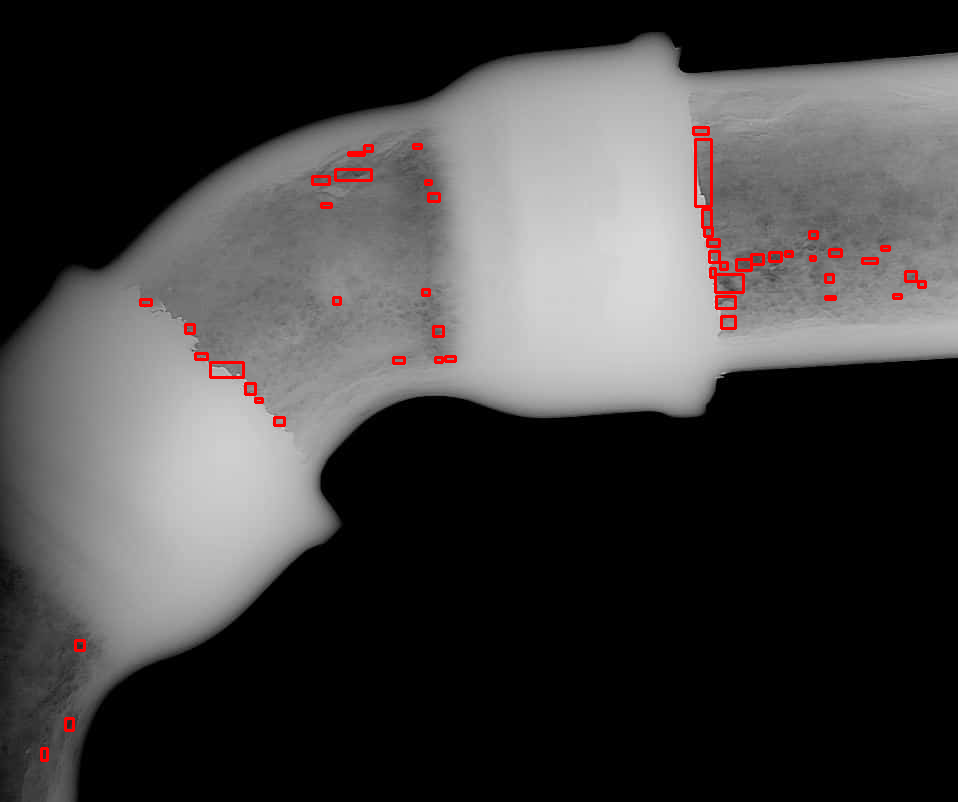

In [ ]:
pipe_img_rgb = cv2.cvtColor(pipe_img, cv2.COLOR_BGR2RGB)
display(pipe_img_rgb)

# Comment
## According to the issues raised in the project, two main solutions have been implemented to improve the accuracy of pipe damage detection. Due to the sharing of dark color in both black background and pipe damage, it is possible to misdiagnose the background as damage. The main steps are as follows:



### actions taken:

1. **Image preprocessing:**
    - First, the original image was improved using the Unsharp Mask filter to better define the details of the damage.
    - By applying Adaptive Thresholding, the image was converted to binary mode to show the damage more clearly.

2. **choosing the detection method:**
    - Two different methods were tested to detect pipe damage.
    - The first method uses the maximum contour and the corresponding mask to accurately detect the pipe and separate it from the background.
    - The second method is by determining the size ranges for diagnostic squares.

3. **choosing the best method:**
    - After testing and comparing the two methods, it was found that the same results can be obtained from both.
    - According to the quantity of code, higher speed and better access to make changes for a better result, the second method has been chosen.

# **Using Heatmap**

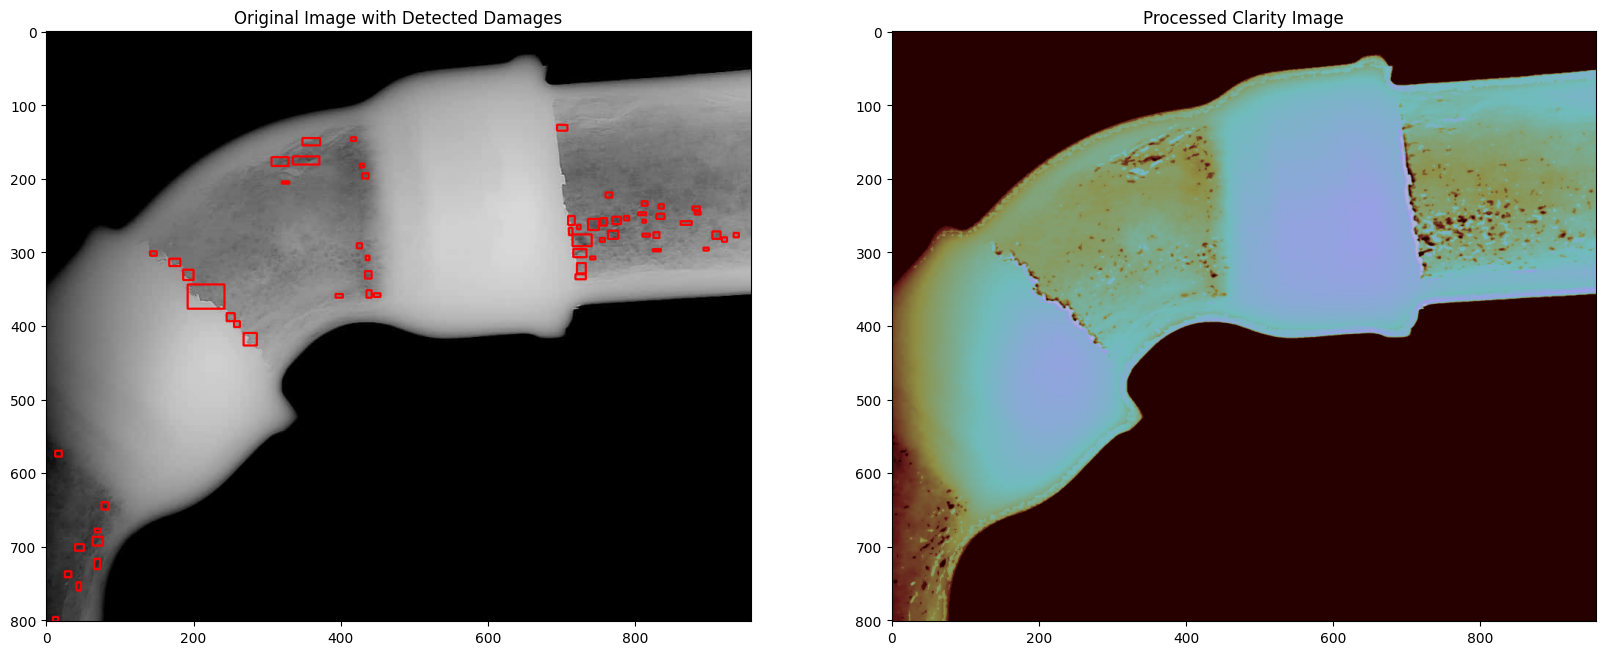

In [ ]:
import cv2
import numpy as np
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt

# Load the original image
original_image = cv2.imread('pipe.JPG')
processed_image = original_image.copy()

# Apply Gaussian Blur for Noise Reduction
processed_image = cv2.GaussianBlur(processed_image, (5, 5), 0)

# Enhance the image using Unsharp Mask Filter
enhanced_image = Image.fromarray(processed_image)
enhanced_image = enhanced_image.filter(ImageFilter.UnsharpMask(radius=5, percent=400, threshold=5))
processed_image = np.array(enhanced_image)

# Plot heatmap overlay on the whole image
heatmap_weld = cv2.applyColorMap(processed_image, cv2.COLORMAP_JET)
heatmap_weld = cv2.addWeighted(processed_image, 0.7, heatmap_weld, 0.3, 0)
processed_image = heatmap_weld

# Convert the image to grayscale
gray_image = cv2.cvtColor(processed_image, cv2.COLOR_BGR2GRAY)

# Apply Adaptive Thresholding
threshold_image = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 55, 8)

# Apply Morphological Operations (Erosion)
kernel_size = (2, 3)
kernel = np.ones(kernel_size, np.uint8)
eroded_image = cv2.erode(threshold_image, kernel, iterations=1)

# Find Contours in the eroded image
contours, _ = cv2.findContours(eroded_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw bounding boxes around detected damages on the original image
for contour in contours:
    area = cv2.contourArea(contour)
    if 10 < area < 200:  # Adjust the size threshold as needed
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(original_image, (x, y), (x + w, y + h), (0, 0, 255), 2)

# Display the results using matplotlib subplot
plt.figure(figsize=(20, 15))

# Plot the original image with bounding boxes
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image with Detected Damages')

# Plot the clarity image
plt.subplot(1, 2, 2)
plt.imshow(processed_image, cmap='gray')
plt.title('Processed Clarity Image')

plt.show()
